# Exploring the new dataset

In [1]:
import os
import cv2
import json
import glob
import uuid
import pickle
import random
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)

In [2]:
# Dataset folder
dataset_folder = '/home/arian/Documents/proyecto-integrador/data/dataset-v4'
classes_folders = glob.glob(os.path.join(dataset_folder, '*'))
num_classes = len(classes_folders)

In [3]:
# Count data per class
data = {}

for class_folder in classes_folders:
    image_files = glob.glob(os.path.join(class_folder, '*.jpg'))
    class_id, class_label = os.path.basename(class_folder).split('-', maxsplit=1)
    
    data[class_label] = len(image_files)
    
print(data)

{'max-60': 4108, 'control-policial': 212, 'escuela': 1658, 'contramano': 1603, 'cruce': 5990, 'no-estacionar-detenerse': 617, 'max-130': 568, 'empalme-der': 4009, 'max-40': 3145, 'max-20': 58, 'max-50': 505, 'max-80': 4690, 'lomada': 998, 'curva-der': 3912, 'no-estacionar': 238, 'curva-izq': 3912, 'empalme-izq': 4027, 'max-120': 986, 'max-30': 31, 'max-100': 1141}


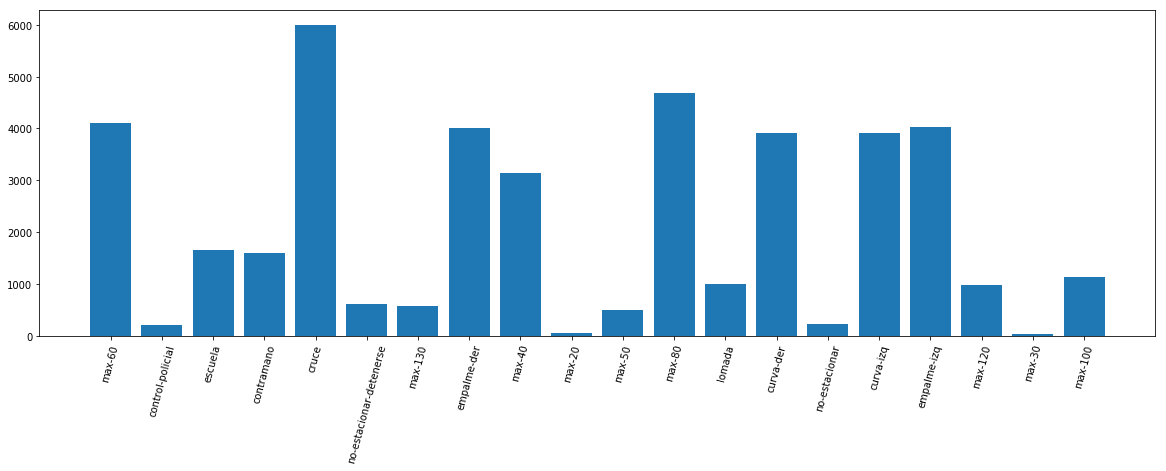

In [4]:
# Plot data distribution
plt.bar(range(len(data)), data.values(), align='center')
plt.xticks(range(len(data)), data.keys())
locs, labels = plt.xticks()
plt.setp(labels, rotation=75)
plt.show()

### Generate new data for the classes with less data

In [5]:
# Import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [6]:
print('\n'.join(classes_folders))

/home/arian/Documents/proyecto-integrador/data/dataset-v4/17-max-100
/home/arian/Documents/proyecto-integrador/data/dataset-v4/3-contramano
/home/arian/Documents/proyecto-integrador/data/dataset-v4/16-max-80
/home/arian/Documents/proyecto-integrador/data/dataset-v4/6-escuela
/home/arian/Documents/proyecto-integrador/data/dataset-v4/15-max-60
/home/arian/Documents/proyecto-integrador/data/dataset-v4/11-max-20
/home/arian/Documents/proyecto-integrador/data/dataset-v4/8-no-estacionar
/home/arian/Documents/proyecto-integrador/data/dataset-v4/14-max-50
/home/arian/Documents/proyecto-integrador/data/dataset-v4/1-empalme-izq
/home/arian/Documents/proyecto-integrador/data/dataset-v4/4-curva-izq
/home/arian/Documents/proyecto-integrador/data/dataset-v4/13-max-40
/home/arian/Documents/proyecto-integrador/data/dataset-v4/10-control-policial
/home/arian/Documents/proyecto-integrador/data/dataset-v4/19-max-130
/home/arian/Documents/proyecto-integrador/data/dataset-v4/0-cruce
/home/arian/Documents/p

In [94]:
# Class folder to augmentate the data
class_folder = classes_folders[0]
print(class_folder)

/home/arian/Documents/proyecto-integrador/data/dataset-v4/17-max-100


In [95]:
# Read images of that class
image_list = glob.glob(os.path.join(class_folder, '*.jpg'))

images = []

for image in image_list:
    img = cv2.imread(image)
    img = cv2.resize(img, (64, 64))
    img = img[...,::-1]
    images.append(img)
    
images = np.array(images)

In [96]:
# Data generator
datagen = ImageDataGenerator(rotation_range=5,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             fill_mode='nearest')

In [97]:
datagen.fit(images)

In [98]:
images_to_generate = 3200
output_path = '/home/arian/output/max-100'

In [99]:
times = 0

for x_batch, y_batch in datagen.flow(images, images, batch_size=len(image_list)):
    
    for i in range(len(image_list)):
        rand_brightness = random.randint(-100, 100)
        out = cv2.add(x_batch[i], np.array([float(rand_brightness)]))
        out = out[...,::-1]
        img_path = os.path.join(output_path, str(uuid.uuid4()) + '.jpg')
        cv2.imwrite(img_path, out)
        
        times += 1
        
        if times == images_to_generate: 
            break
    
    if times == images_to_generate:
        break